In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Ön işlenmiş verileri oku
df = pd.read_csv('./preprocessed_data/lemmatized_and_misspelled_removed_SEFACED.csv', encoding='utf-8')

# Kök alınmış kelimeleri çıkar
corpus = df['lemmatized_tokens']

# Bir CountVectorizer oluştur
vectorizer = CountVectorizer()

# Kök alınmış kelimeleri dönüştür
X_bow = vectorizer.fit_transform(corpus)

# Seyrek matrisi bir DataFrame'e dönüştür
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Ek özellikleri içeren CSV dosyasını yükle
df_features = pd.read_csv('./data_with_extra_features/SEFACED_all_f eatures.csv')

# İstenilen sütunları df_features'dan çıkar
desired_columns = ['html_tag_count', 'css_tag_count', 'spam_phrase_count', 'link_count', 'grammar_error_count', 'misspelled_word_count']
df_desired_features = df_features[desired_columns]

# df_bow'u istenilen özelliklerle birleştir
df_merged = pd.concat([df_bow, df_desired_features], axis=1)

print(df_merged)



       aa  aba  abandon  abandoned  abandonment  abased  abatement  abb  \
0       0    0        0          0            0       0          0    0   
1       0    0        0          0            0       0          0    0   
2       0    0        0          0            0       0          0    0   
3       0    0        0          0            0       0          0    0   
4       0    0        0          0            0       0          0    0   
...    ..  ...      ...        ...          ...     ...        ...  ...   
17110   0    0        0          0            0       0          0    0   
17111   0    0        0          0            0       0          0    0   
17112   0    0        0          0            0       0          0    0   
17113   0    0        0          0            0       0          0    0   
17114   0    0        0          0            0       0          0    0   

       abbas  abbey  ...  zone  zoning  zoo  zoom  html_tag_count  \
0          0      0  ...     0

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

y = df['Class_Label']

# Veri kümesini eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(df_merged, y, test_size=0.2, random_state=42)


In [7]:
df_merged.to_csv("with_bow.csv", index= False)
y.to_csv("with_bow_labels.csv", index=False)



(17115, 12857)
(17115, 1)
Normal


C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                128580    
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 128,712
Trainable params: 128,712
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
2739/2739 - 14s - loss: 0.1007 - accuracy: 0.9675 - 14s/epoch - 5ms/step
Epoch 2/200
2739/2739 - 12s - loss: 0.0195 - accuracy: 0.9938 - 12s/epoch - 4ms/step
Epoch 3/200
2739/2739 - 12s - loss: 0.0076 - accuracy: 0.9977 - 12s/epoch - 4ms/step
Epoch 4/200
2739/2739 -

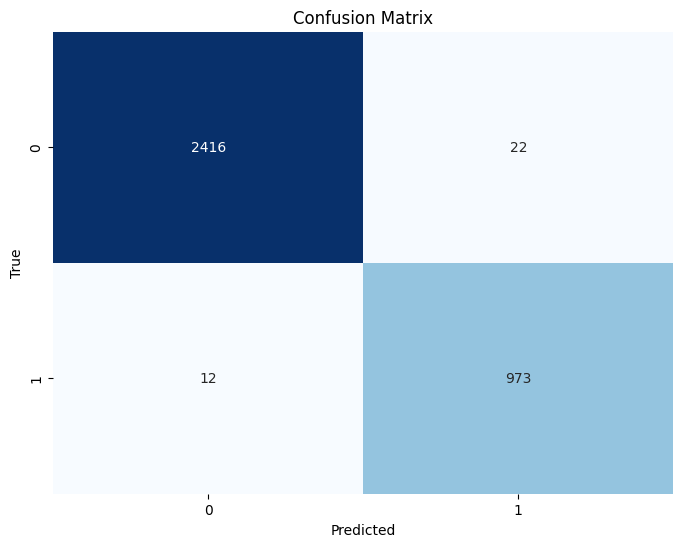

In [8]:
#LSTM

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

df = pd.read_csv("./with_bow.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")
print(x.shape)
print(y_.shape)

print(y_["Class_Label"].iloc[2])

y = []
i = 0
while i < 17115 :
        if y_["Class_Label"].iloc[i] == "Normal":
                y.append(0)
        else:
                y.append(1)
        i += 1

y = np.array(y)
y_ = y.reshape(-1, 1)



# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(12857,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(2, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

y_pred = model.predict(test_x)

y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

lstm_accuracy = accuracy_score(test_y_classes, y_pred_classes )
lstm_precision = precision_score(test_y_classes, y_pred_classes )
lstm_recall = recall_score(test_y_classes, y_pred_classes )
lstm_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {lstm_accuracy}")
print(f"Precision: {lstm_precision}")
print(f"Recall: {lstm_recall}")
print(f"F1-score: {lstm_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12855, 64)         256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6427, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6425, 32)          6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3212, 32)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 102784)            0         
                                                                 
 dense (Dense)         

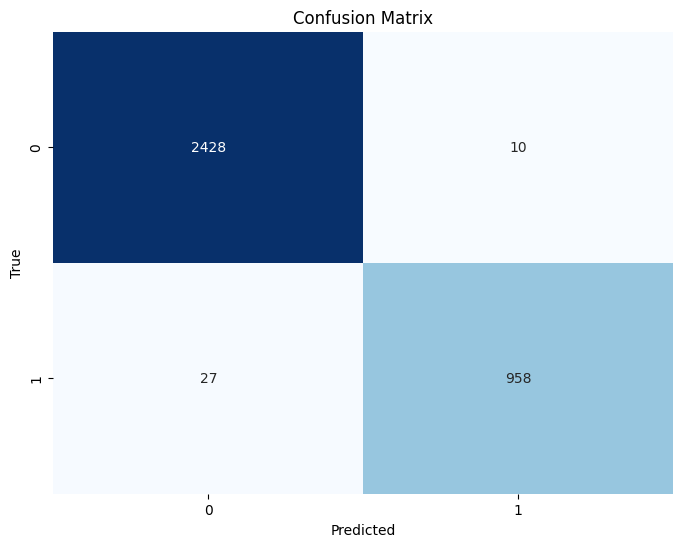

In [9]:
# CNN


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

df = pd.read_csv("./with_bow.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")

y = []
for label in y_["Class_Label"]:
    if label == "Normal":
        y.append(0)
    else:
        y.append(1)

y = np.array(y)
y_ = y.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Reshape input data for CNN (samples, features, channels)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

# Build the CNN model
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(12857, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=32, epochs=10)

# Evaluate the model
y_pred = model.predict(test_x)

y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

cnn_accuracy = accuracy_score(test_y_classes, y_pred_classes )
cnn_precision = precision_score(test_y_classes, y_pred_classes )
cnn_recall = recall_score(test_y_classes, y_pred_classes )
cnn_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1-score: {cnn_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Logistic Regression Classifier:
Accuracy: 0.985977212971078
Precision: 0.9873572593800979
Recall: 0.9930270713699754
F1 Score: 0.9901840490797545


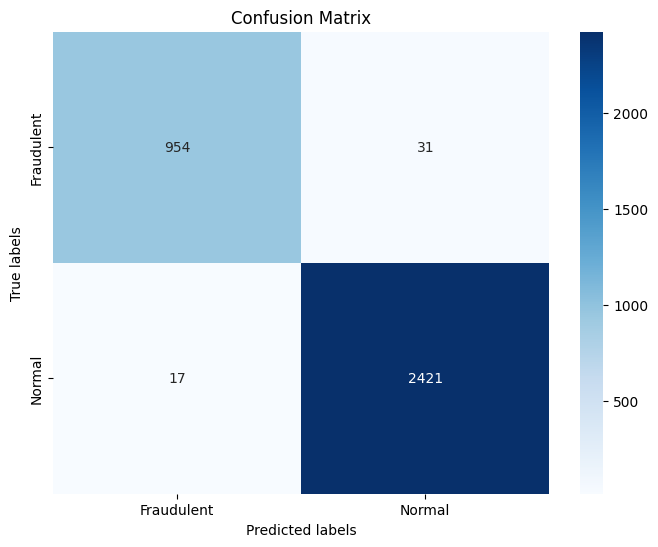

In [4]:
# Lojistik regresyon

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score



# Lojistik regresyon modelini eğit
lr_model = LogisticRegression(max_iter=10000)  
lr_model.fit(X_train, y_train)

# Test kümesi üzerinde tahminler yap
lr_predictions = lr_model.predict(X_test)

# Modeli değerlendir

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, pos_label='Normal')
lr_recall = recall_score(y_test, lr_predictions, pos_label='Normal')
lr_f1_score = f1_score(y_test, lr_predictions, pos_label='Normal')

print("Logistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print("F1 Score:", lr_f1_score)
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, lr_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier:
Accuracy: 0.992988606485539
Precision: 0.9922512234910277
Recall: 0.9979491386382281
F1 Score: 0.9950920245398774


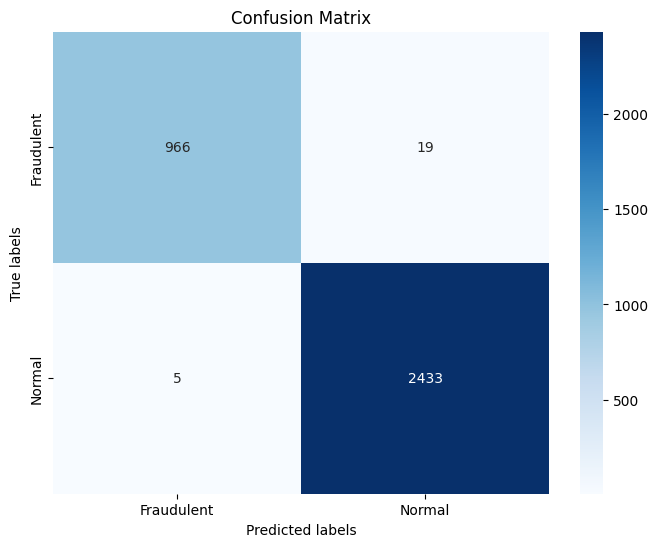

In [5]:
#RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score




# Random Forest modelini başlat
rf_model = RandomForestClassifier()

# Random Forest modelini eğit
rf_model.fit(X_train, y_train)

# Test kümesi üzerinde tahminler yap
rf_predictions = rf_model.predict(X_test)

# Modeli değerlendir
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='Normal')
rf_recall = recall_score(y_test, rf_predictions, pos_label='Normal')
rf_f1_score = f1_score(y_test, rf_predictions, pos_label='Normal')


print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print("F1 Score:", rf_f1_score)

# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, rf_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Classifier:
Accuracy: 0.9751679813029507
Precision: 0.9891891891891892
Recall: 0.9757998359310911
F1-score: 0.9824488953128226


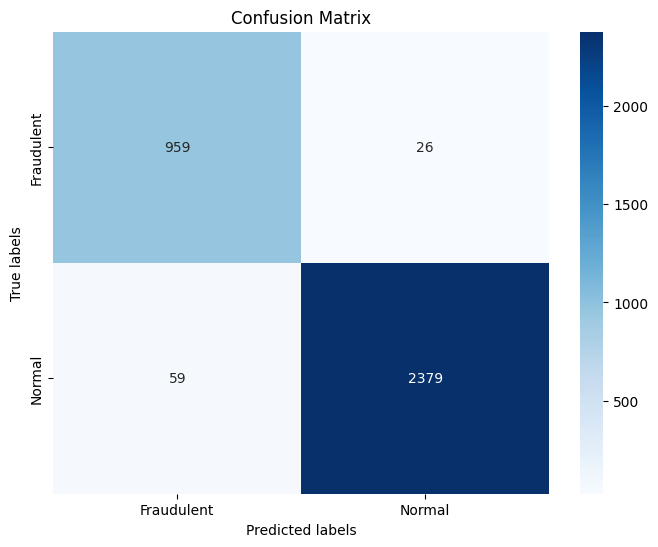

In [6]:
# NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

# Naive Bayes modelini başlat
nb_model = MultinomialNB()

# Naive Bayes modelini eğit
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
nb_predictions = nb_model.predict(X_test)

# Modeli değerlendir
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label='Normal')
nb_recall = recall_score(y_test, nb_predictions, pos_label='Normal')
nb_f1_score = f1_score(y_test, nb_predictions, pos_label='Normal')


print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1_score}")
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, nb_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Support Vector Machine Classifier (LinearSVC):
Accuracy: 0.9886064855390009
Precision: 0.9885947046843178
Recall: 0.9954881050041017
f1_score: 0.9920294297976702


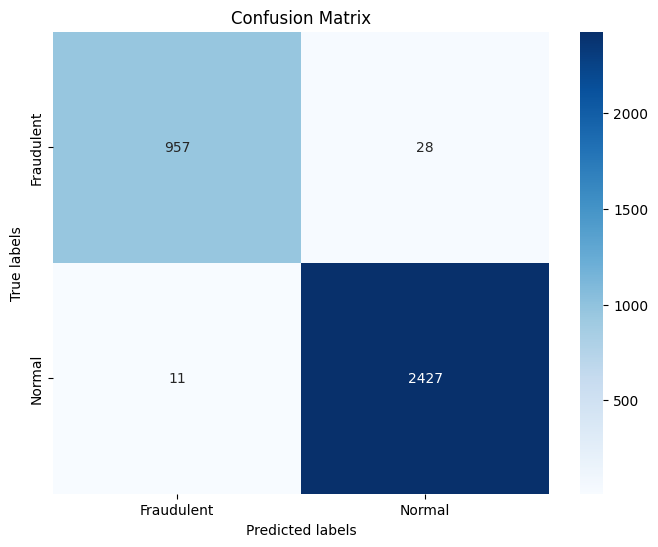

In [7]:
#SVM

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

svm_model = LinearSVC(max_iter=10000000, random_state=42)

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='Normal')
svm_recall = recall_score(y_test, svm_predictions, pos_label='Normal')
svm_f1_score = f1_score(y_test, svm_predictions, pos_label='Normal')

print("Support Vector Machine Classifier (LinearSVC):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"f1_score: {svm_f1_score}")

# print("Classification Report:")
# print(classification_report(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

